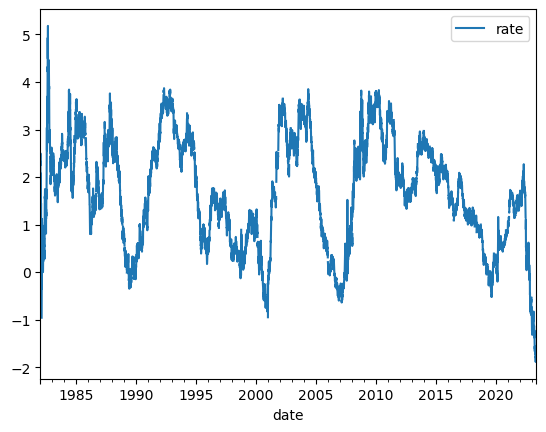

,id,date,rate
0,1,1982-01-04,2.32
1,2,1982-01-05,2.24
2,3,1982-01-06,2.43
3,4,1982-01-07,2.46
4,5,1982-01-08,2.50


In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('data/db.sqlite')
yield_df = pd.read_sql_query("SELECT * FROM yield_curve", conn)
yield_df["rate"] = pd.to_numeric(yield_df["rate"], errors="coerce")
yield_df["date"] = pd.to_datetime(yield_df["date"])

yield_df.plot(x="date", y="rate")
plt.show()
yield_df.head()


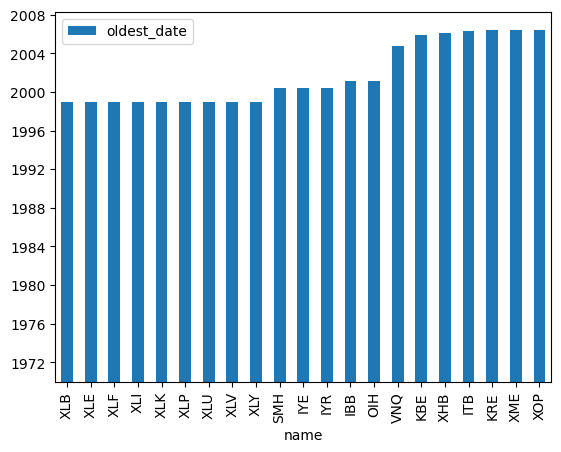

,open,name,oldest_date
0,20.781250,XLB,1998-12-21
1,23.312500,XLE,1998-12-21
2,19.052092,XLF,1998-12-21
3,23.203125,XLI,1998-12-21
4,32.406250,XLK,1998-12-21
5,25.875000,XLP,1998-12-21
6,30.250000,XLU,1998-12-21
7,24.812500,XLV,1998-12-21
8,25.312500,XLY,1998-12-21
9,48.750000,SMH,2000-06-05


In [6]:
df1 = pd.read_sql_query("SELECT open, name, MIN(date) AS oldest_date FROM sector_etfs GROUP BY name ORDER BY oldest_date;", conn)

df1["oldest_date"] = pd.to_datetime(df1["oldest_date"])

df1.plot(kind="bar", x="name", y="oldest_date")
plt.show()
df1.head(22)

In [27]:
etf_df = pd.read_sql_query("SELECT * FROM sector_etfs;", conn)
etf_df["date"] = pd.to_datetime(etf_df["date"])
etf_df["open"] = pd.to_numeric(etf_df["open"], errors="coerce")
etf_df["close"] = pd.to_numeric(etf_df["close"], errors="coerce")
etf_df["high"] = pd.to_numeric(etf_df["high"], errors="coerce")
etf_df["low"] = pd.to_numeric(etf_df["low"], errors="coerce")

start_date = '2006-08-01'

etf_df = etf_df.loc[etf_df['date'] >= start_date]

etf_df.set_index('date', inplace=True)

etf_df

,id,name,open,high,low,close,volume
date,,,,,,,
2006-08-07,287,IBB,23.643333,23.763332,22.873333,22.973333,16116600
2006-08-14,288,IBB,23.166668,24.096666,22.920000,24.063334,18314400
2006-08-21,289,IBB,23.803333,24.163334,23.706667,24.133333,8110200
2006-08-28,290,IBB,24.166668,25.026667,24.059999,24.776667,13446900
2006-09-04,291,IBB,24.676666,24.793333,23.790001,24.073334,16305000
...,...,...,...,...,...,...,...
2023-05-01,23745,XOP,125.269997,127.430000,115.889999,120.330002,27125500
2023-05-08,23746,XOP,123.400002,124.120003,116.860001,119.019997,19526000
2023-05-15,23747,XOP,120.169998,124.919998,117.720001,123.040001,20952300


              id name        open        high         low       close   volume
date                                                                          
2006-08-07  6539  OIH  949.133362  953.799988  909.466675  917.666687  7276620
2006-08-14  6540  OIH  909.666687  932.866638  895.200012  928.000000  7131885
2006-08-21  6541  OIH  940.000000  944.533325  908.400024  932.666687  4400310
2006-08-28  6542  OIH  920.666687  932.799988  888.866638  921.533325  6470445
2006-09-04  6543  OIH  915.400024  941.333313  873.799988  876.333313  6046365
...          ...  ...         ...         ...         ...         ...      ...
2023-05-01  7412  OIH  270.299988  274.989990  249.419998  261.579987  3466400
2023-05-08  7413  OIH  265.920013  268.679993  250.399994  253.000000  2346900
2023-05-15  7414  OIH  254.830002  263.010010  248.830002  260.010010  2473400
2023-05-22  7415  OIH  260.200012  270.100006  257.799988  259.799988  2375500
2023-05-26  7416  OIH  262.529999  264.635010  257.9

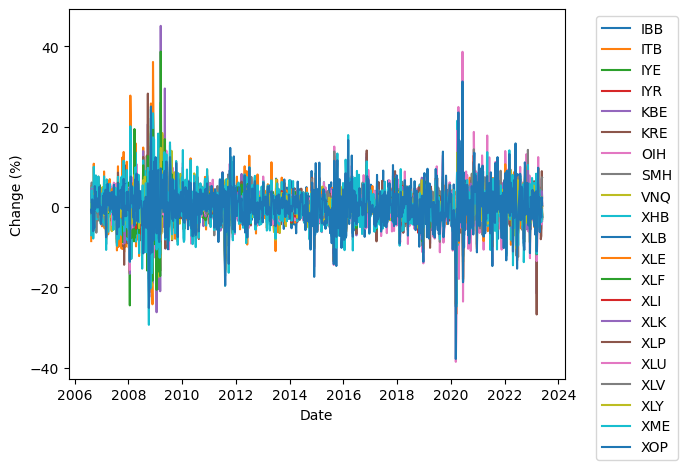

              id name       open       high        low      close    volume  \
date                                                                          
2006-08-14  8715  VNQ  68.059998  69.430000  67.910004  69.389999    233300   
2006-08-21  8716  VNQ  69.339996  70.519997  69.239998  69.959999    214800   
2006-08-28  8717  VNQ  70.099998  71.639999  69.320000  70.870003    304800   
2006-09-04  8718  VNQ  71.139999  71.589996  70.260002  71.339996    218800   
2006-09-11  8719  VNQ  71.029999  73.180000  70.790001  73.089996    304600   
...          ...  ...        ...        ...        ...        ...       ...   
2023-05-01  9587  VNQ  83.309998  83.620003  80.430000  82.989998  29591000   
2023-05-08  9588  VNQ  82.809998  83.269997  81.250000  82.029999  24218800   
2023-05-15  9589  VNQ  82.169998  82.379997  79.620003  80.400002  22536600   
2023-05-22  9590  VNQ  80.470001  81.550003  77.809998  79.300003  23250900   
2023-05-26  9591  VNQ  78.529999  79.449997  78.1750

In [28]:
print(etf_df[etf_df["name"] == "OIH"])

etf_df['change'] = etf_df['open'].pct_change() * 100
etf_df.dropna(inplace=True)

etf_df = etf_df.loc[etf_df.index >= "2006-08-08"]

fig, ax = plt.subplots()
for name in etf_df['name'].unique():
    if name == None:
        continue
    data = etf_df[etf_df['name'] == name]
    ax.plot(data.index, data['change'], label=name)

ax.set_ylabel('Change (%)')
ax.set_xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(etf_df[etf_df["name"] == "VNQ"])